In [5]:
import datetime
import os
import numpy as np 
import pandas as pd
import scipy
import glob


from qerr_utils import *
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
# Get a list of files in a directory
k = None

def getFiles(dirName):
    global k
    # os.chdir()
    allFiles = np.asarray(glob.glob(f"{dirName}/*.txt"))
    # Sort files - Note that this will not work if you have a different enumeration setup (e.g. you don't have an underscore)
    k = allFiles[0]
    def get_key(x):
        idx = x.rindex('_') + 1
        seqno = float(x[idx:].split('.')[0])
        return seqno
    allFiles = sorted(allFiles, key = lambda x: get_key(x))
    print(allFiles)
    return allFiles[:]

# Read data from data files
def getData(aFile):
    times = []
    deltas = []
    with open(aFile, 'r') as f:
        f.readline()
        for aLine in f:
            holder = aLine.split('\t')
            aDate = datetime.datetime.strptime(holder[0], '%m/%d/%Y %H:%M:%S.%f:')
            if float(holder[1].strip()) < 1e5:
                times.append(aDate)
                deltas.append(float(holder[1].strip()))
    return times, deltas

def scope_to_df(dataDir):
    allFiles = getFiles(dataDir)

    allTimes = []
    allDeltas = []
    
    # Get a list of files
    for aFile in allFiles:
        holderTimes, holderDeltas = getData(aFile)
        allTimes = np.concatenate((allTimes, holderTimes))
        allDeltas = np.concatenate((allDeltas, holderDeltas))
    
    df = pd.DataFrame(
        {
            'unix_timestamp': allTimes,
            'delta (ns)': allDeltas
        }
    )
    return df


def qerr_vs_time(df, scope_name):
    df['seconds elapsed'] = (df['towMS (ms)'] - df['towMS (ms)'].min()) / 10**3
    f, ax = plt.subplots(1, 1, figsize=(20, 5))
    sns.lineplot(df, x='seconds elapsed', y='qErr (ps)', linewidth=1.2, ax=ax)
    sns.regplot(df, x='seconds elapsed', y='qErr (ps)', scatter=True, ax=ax, order=15, scatter_kws={'s':2})
    
    ax.set_title(f'Q-Errors (ps) vs Elapsed Time (s) [{scope_name}]');
    ax.set_xlabel('Elapsed Time (s)')
    ax.set_ylabel('Q-Errors (ps)')

def qerr_hist(df):
    f, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.histplot(df, x='qErr (ps)', stat='density', ax=ax)
    ax.set_title('Distribution of Q-Errors (ps)')
    ax.set_xlabel('Q-Errors (ps)');

def load_merged_df(merged_fpath):
    df = load_data(merged_fpath)
    df['unix_timestamp'] = df['pkt_unix_timestamp_TIM-TP'].astype('datetime64[ns]')
    df['qErr (ns)'] = df['qErr (ps)'] * 1e-3
    return df

In [7]:
!pwd

/Users/nico/panoseti/gnss-pdft/qerr


In [9]:
fpath_s3 = 'data/data/start_2024-07-02T14:04:16.067741.device_ttyUSB1/data-type_MERGED.start_2024-07-02T14:04:16.067741'
fpath_s5 = 'data/data/start_2024-07-02T14:04:24.059631.device_ttyUSB0/data-type_MERGED.start_2024-07-02T14:04:24.059631'

s5 = load_merged_df(fpath_s3)
s3 = load_merged_df(fpath_s5)
d = scope_to_df('../scope/ScopeData/fixed-mode-DGNSS-20240702')
# qerr_vs_time(s3, 's3'),qerr_vs_time(s5, 's5');

['../scope/ScopeData/fixed-mode-DGNSS-20240702/scopeData_1.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702/scopeData_2.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702/scopeData_3.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702/scopeData_4.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702/scopeData_5.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702/scopeData_6.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702/scopeData_7.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702/scopeData_8.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702/scopeData_9.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702/scopeData_10.txt']


In [4]:
fpath_s3 = 'data/data/start_2024-07-02T15:10:43.112152.device_ttyUSB1/data-type_MERGED.start_2024-07-02T15:10:43.112152'
fpath_s5 = 'data/data/start_2024-07-02T15:10:46.117153.device_ttyUSB0/data-type_MERGED.start_2024-07-02T15:10:46.117153'

s5 = load_merged_df(fpath_s3)
s3 = load_merged_df(fpath_s5)
d = scope_to_df('../scope/ScopeData/fixed-mode-20240702-1')
# qerr_vs_time(s3, 's3'),qerr_vs_time(s5, 's5');

['../scope/ScopeData/fixed-mode-20240702-1/scopeData_1.txt', '../scope/ScopeData/fixed-mode-20240702-1/scopeData_2.txt', '../scope/ScopeData/fixed-mode-20240702-1/scopeData_3.txt', '../scope/ScopeData/fixed-mode-20240702-1/scopeData_4.txt', '../scope/ScopeData/fixed-mode-20240702-1/scopeData_5.txt', '../scope/ScopeData/fixed-mode-20240702-1/scopeData_6.txt', '../scope/ScopeData/fixed-mode-20240702-1/scopeData_7.txt', '../scope/ScopeData/fixed-mode-20240702-1/scopeData_8.txt', '../scope/ScopeData/fixed-mode-20240702-1/scopeData_9.txt', '../scope/ScopeData/fixed-mode-20240702-1/scopeData_10.txt', '../scope/ScopeData/fixed-mode-20240702-1/scopeData_11.txt']


In [10]:
fpath_s3 = 'data/data/start_2024-07-02T16:18:52.103450.device_ttyUSB1/data-type_MERGED.start_2024-07-02T16:18:52.103450'
fpath_s5 = 'data/data/start_2024-07-02T16:18:48.088326.device_ttyUSB0/data-type_MERGED.start_2024-07-02T16:18:48.088326'

s5 = load_merged_df(fpath_s3)
s3 = load_merged_df(fpath_s5)
d = scope_to_df('../scope/ScopeData/fixed-mode-DGNSS-20240702-1')
# qerr_vs_time(s3, 's3'),qerr_vs_time(s5, 's5');

['../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_1.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_2.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_3.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_4.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_5.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_6.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_7.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_8.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_9.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_10.txt', '../scope/ScopeData/fixed-mode-DGNSS-20240702-1/scopeData_11.txt']


In [11]:
def align_data(s3, s5, d):
    print('Finding data offsets to minimize variance in qErr corrected data')
    # Get timestamps
    s3_tst = s3['unix_timestamp']
    s5_tst = s5['unix_timestamp']
    d_tst = d['unix_timestamp']
    
    # Find latest start time among d, s3, and s5 dataframes.
    
    latest_start_time = max(s3_tst.min(), s5_tst.min(), d_tst.min())
    # print(s3_tst.min(), s5_tst.min(), d_tst.min(), latest_start_time)
    
    # Find indices in each dataset closest to latest start time.
    s3_start_idx = np.searchsorted(s3_tst, latest_start_time)
    s5_start_idx = np.searchsorted(s5_tst, latest_start_time)
    d_start_idx = np.searchsorted(d_tst, latest_start_time)
    
    # Find best offsets for alignment.
    best_s3_offset = 0
    best_s5_offset = 0
    best_d_offset = 0
    min_var = float('inf')
    for s3_off in range(max(0, min(0, s3_start_idx - 10)), 10):
        for s5_off in range(max(0, min(0, s5_start_idx - 10)), 10):
            for d_off in range(max(0, min(0, d_start_idx - 10)), 10):
                # Trim data frames so that the earliest record is the latest starting time.
                s3_aligned = s3[s3_start_idx + s3_off:]
                s5_aligned = s5[s5_start_idx + s5_off:]
                d_aligned = d[d_start_idx + d_off:]
                
                # Add elapsed time to dataframes for plotting
                s3_aligned['Elapsed Time (s)'] = (s3_aligned['unix_timestamp'] - s3_aligned['unix_timestamp'].min()).apply(datetime.timedelta.total_seconds).round(0)
                s5_aligned['Elapsed Time (s)'] = (s5_aligned['unix_timestamp'] - s5_aligned['unix_timestamp'].min()).apply(datetime.timedelta.total_seconds).round(0)
                d_aligned['Elapsed Time (s)'] = (d_aligned['unix_timestamp'] - d_aligned['unix_timestamp'].min()).apply(datetime.timedelta.total_seconds).round()
                
                # Trim data frames to same length.
                len_limit = min(len(d_aligned), len(s3_aligned), len(s5_aligned))
                s3_aligned = s3_aligned[:len_limit]
                s5_aligned = s5_aligned[:len_limit]
                d_aligned = d_aligned[:len_limit]
                
                # Use elapsed time for index
                s3_aligned = s3_aligned.set_index('Elapsed Time (s)')
                s5_aligned = s5_aligned.set_index('Elapsed Time (s)')
                d_aligned = d_aligned.set_index('Elapsed Time (s)')
        
                # d_aligned['delta & qerrs (ns) [s3 - s5]'] = d_aligned['delta (ns)'] - (s3_aligned['qErr (ns)'] - s5_aligned['qErr (ns)'])
                d_no_qerr = d_aligned['delta (ns)'] - (s5_aligned['qErr (ns)'] - s3_aligned['qErr (ns)'])
                
                # reset_index
                s3_aligned = s3_aligned.reset_index()
                s5_aligned = s5_aligned.reset_index()
                d_aligned = d_aligned.reset_index()
                
                # corr = scipy.signal.correlate(qerr, d_aligned['delta (ns)'])[0]
                curr_var = np.var(d_no_qerr)
                if curr_var < min_var:
                    # print(s3_off, s5_off, d_off)
                    # print(curr_var)
                    best_s3_offset = s3_off
                    best_s5_offset = s5_off
                    best_d_offset = d_off
                    min_var = curr_var
    print('Done')
    print(f'Best array offsets:\n\ts3: {s3_start_idx + best_s3_offset}\n\ts5: {s5_start_idx + best_s5_offset}\n\td: {d_start_idx + best_d_offset}')
    print(f'Min variance in qErr corrected data: {curr_var}')
    s3_aligned = s3[s3_start_idx + best_s3_offset:]
    s5_aligned = s5[s5_start_idx + best_s5_offset:]
    d_aligned = d[d_start_idx + best_d_offset:]
    return s3_aligned, s5_aligned, d_aligned

In [12]:
s3_aligned, s5_aligned, d_aligned = align_data(s3, s5, d)

# Add elapsed time to dataframes for plotting
s3_aligned['Elapsed Time (s)'] = (s3_aligned['unix_timestamp'] - s3_aligned['unix_timestamp'].min()).apply(datetime.timedelta.total_seconds).round(0)
s5_aligned['Elapsed Time (s)'] = (s5_aligned['unix_timestamp'] - s5_aligned['unix_timestamp'].min()).apply(datetime.timedelta.total_seconds).round(0)
d_aligned['Elapsed Time (s)'] = (d_aligned['unix_timestamp'] - d_aligned['unix_timestamp'].min()).apply(datetime.timedelta.total_seconds).round(0)

# Trim data frames to same length.
len_limit = min(len(d_aligned), len(s3_aligned), len(s5_aligned))
s3_aligned = s3_aligned[:len_limit]
s5_aligned = s5_aligned[:len_limit]
d_aligned = d_aligned[:len_limit]

# Use elapsed time for index
s3_aligned = s3_aligned.set_index('Elapsed Time (s)')
s5_aligned = s5_aligned.set_index('Elapsed Time (s)')
d_aligned = d_aligned.set_index('Elapsed Time (s)')


"""
Dan's email:
corrected_deltaT =   (Tpps1 - qErr1) - (Tpps0 - qErr0)   (1) 
                 =   (Tpps1 - Tpps0) - (qErr1 - qErr0)   (2) 
                 =   deltaT - (qErr1 - qErr0)            (3)
"""



d_aligned['delta & qerrs (ns) [s3 - s5]'] = d_aligned['delta (ns)'] - (s3_aligned['qErr (ns)'] - s5_aligned['qErr (ns)'])
d_aligned['delta & qerrs (ns) [s5 - s3]'] = d_aligned['delta (ns)'] - (s5_aligned['qErr (ns)'] - s3_aligned['qErr (ns)'])

# reset_index
s3_aligned = s3_aligned.reset_index()
s5_aligned = s5_aligned.reset_index()
d_aligned = d_aligned.reset_index()

d_diffs = d_aligned['Elapsed Time (s)'].diff()
two_idxs = d_diffs[d_diffs == 2].index.values
two_idxs_times = d_aligned.iloc[two_idxs]
# two_idxs_times

Finding data offsets to minimize variance in qErr corrected data
Done
Best array offsets:
	s3: 130
	s5: 126
	d: 1
Min variance in qErr corrected data: 16.974948645718754


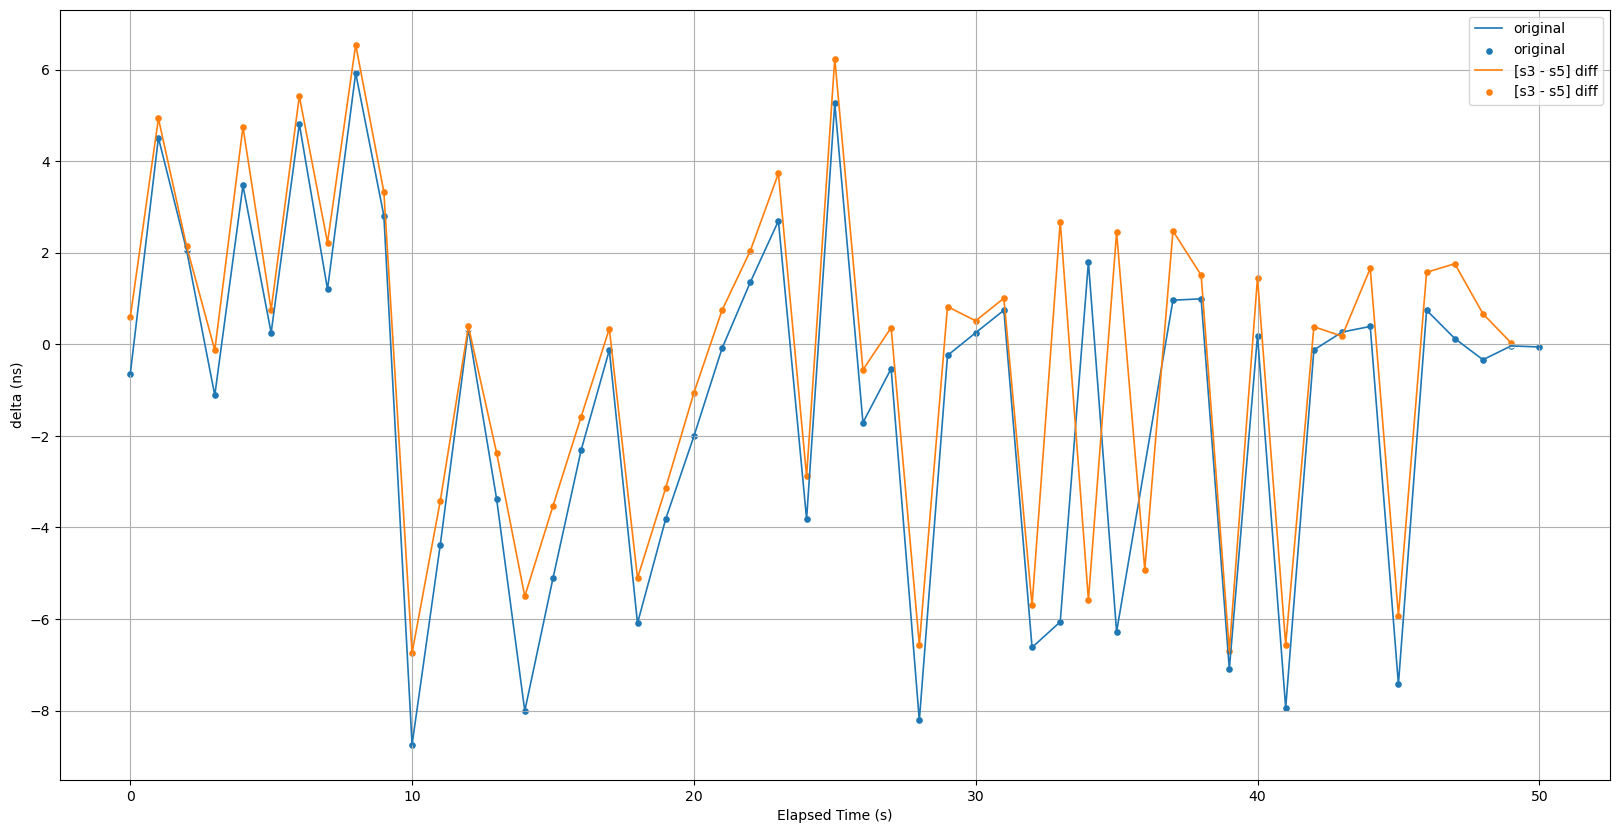

In [13]:
plt.figure(figsize=(20,10))
d_aligned_slice = d_aligned[0:50]
sliced = s5_aligned['qErr (ns)'] - s3_aligned['qErr (ns)'][0:50]
sns.lineplot(d_aligned_slice, x='Elapsed Time (s)', y='delta (ns)', linewidth=1.2,  label='original')
sns.scatterplot(d_aligned_slice, x='Elapsed Time (s)', y='delta (ns)', linewidth=1.2,  label='original')

# sns.lineplot(d_aligned_slice, x='Elapsed Time (s)', y='delta & qerrs (ns) [s3 - s5]', linewidth=1.2,  label='original')
# sns.scatterplot(d_aligned_slice, x='Elapsed Time (s)', y='delta & qerrs (ns) [s3 - s5]', linewidth=1.2,  label='original')
# sns.lineplot(d_aligned_slice, x='Elapsed Time (s)', y='delta & qerrs (ns) [s5 - s3]', linewidth=1.2, label='[s5 - s3]')
sns.lineplot(sliced, linewidth=1.2, label='[s3 - s5] diff')
sns.scatterplot(sliced, linewidth=1.2, label='[s3 - s5] diff')
plt.grid()
plt.show()

<Figure size 7680x5760 with 0 Axes>

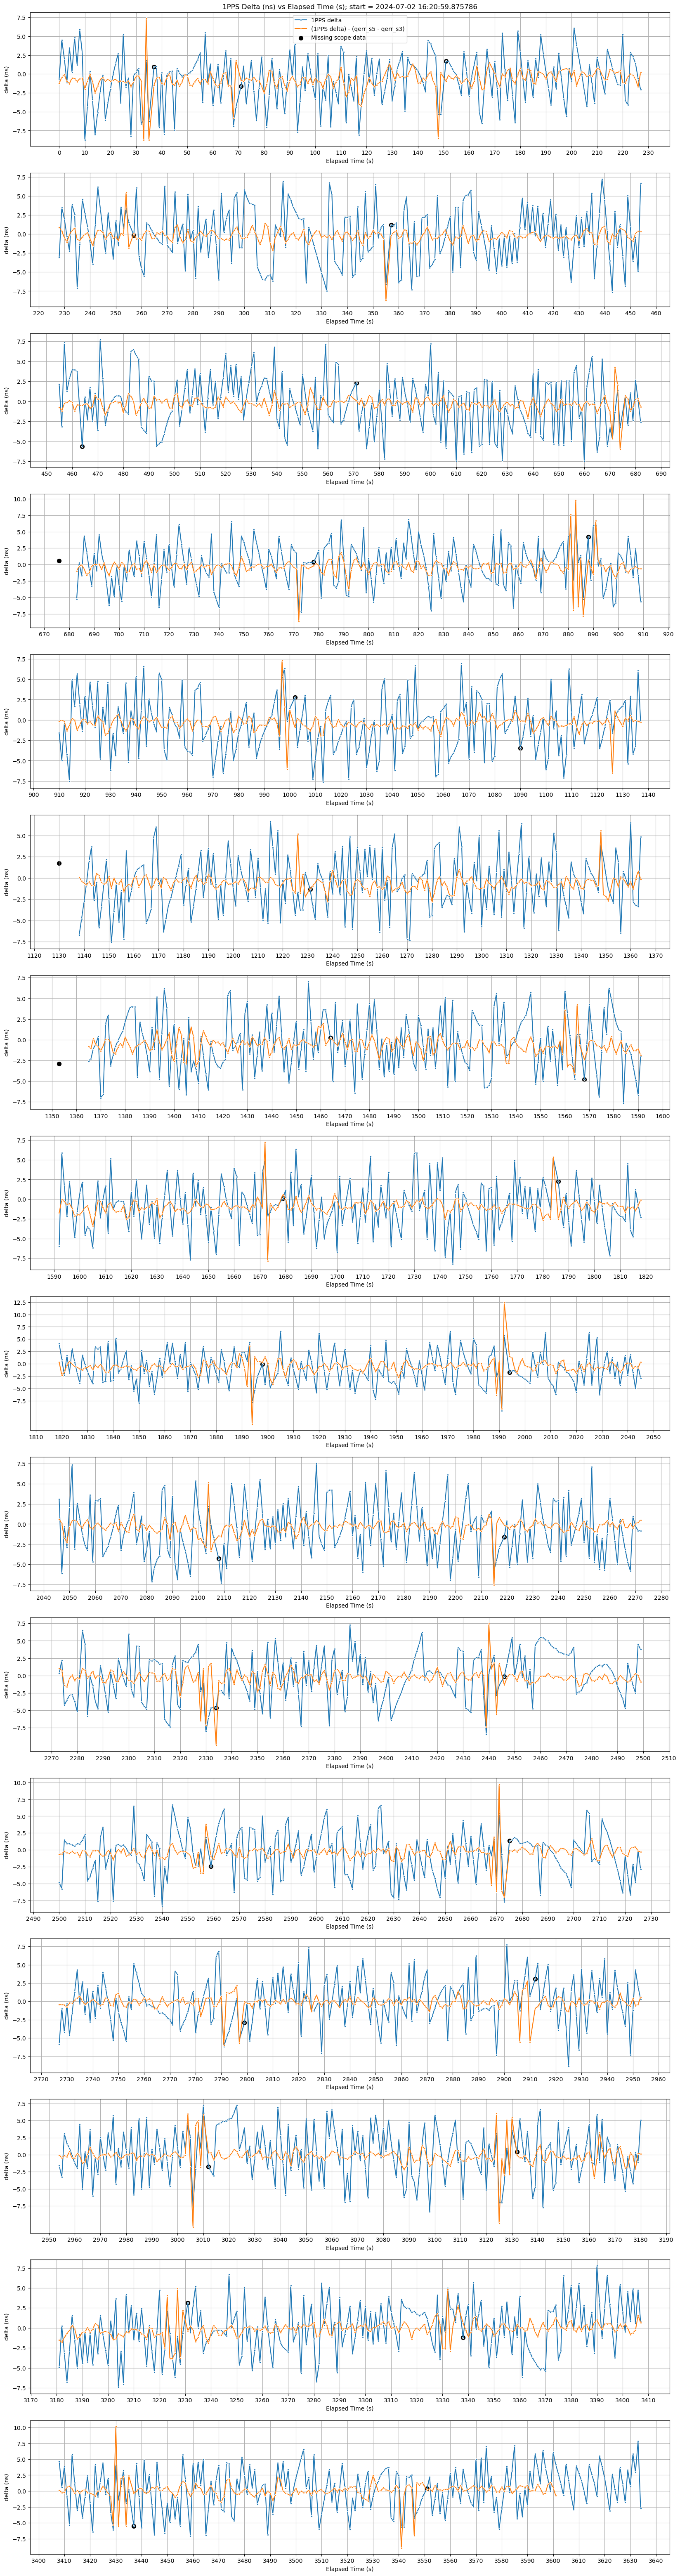

In [14]:
# Original deltas
plt.figure(dpi=1200) 
nslices = 16
slice_size = (len(d_aligned) // nslices)
f, axs = plt.subplots(nslices, 1, figsize=(20, 80))

axs[0].set_title(f'1PPS Delta (ns) vs Elapsed Time (s); start = {d_aligned["unix_timestamp"][0]}');
for i in range(nslices):
    # Compute offsets due to bad scope points.
    offset = sum(two_idxs < slice_size * i)
    pad = sum((slice_size * i <= two_idxs) & (two_idxs <= slice_size * (i + 1)))

    ax = axs[i]
    ax.grid(True)
    ax.set_xticks(np.arange(0, slice_size * (i + 1) + ((pad + offset) // 10 + 2) * 10, 10))
    ax.set_yticks(np.arange(-7.5, 27.5, 2.5))
    
    d_aligned_slice = d_aligned[slice_size * i: slice_size * (i + 1)]
    
    qerrs3 = s3_aligned['qErr (ns)'][slice_size * i + offset: slice_size * (i + 1) + pad + offset]
    qerrs5 = s5_aligned['qErr (ns)'][slice_size * i + offset: slice_size * (i + 1) + pad + offset]
    qerr = qerrs5 - qerrs3
    # (s5_aligned['qErr (ns)'] - s3_aligned['qErr (ns)'])[slice_size * i + offset: slice_size * (i + 1) + pad + offset]


    two_idxs_in_slize = two_idxs_times[((slice_size * i) < two_idxs_times['Elapsed Time (s)']) & (two_idxs_times['Elapsed Time (s)'] <= slice_size * (i + 1))]

    sns.lineplot(d_aligned_slice, x='Elapsed Time (s)', y='delta (ns)',  ax=ax, marker=".", label='1PPS delta')
    sns.lineplot(d_aligned_slice, x='Elapsed Time (s)', y='delta & qerrs (ns) [s5 - s3]', ax=ax, marker=".", label='(1PPS delta) - (qerr_s5 - qerr_s3)')
    # sns.regplot(d_aligned_slice, x='Elapsed Time (s)', y='delta & qerrs (ns) [s5 - s3]', ax=ax, order=2, scatter=False, line_kws={'linewidth':1})


    # sns.lineplot(qerr, linewidth=1.2, ax=ax, label='qerr_s5 - qerr_s3', marker=".")
    
    # sns.lineplot(qerrs3, linewidth=1.2, ax=ax, label='qerr_s3', marker=".")
    # sns.lineplot(qerrs5, linewidth=1.2, ax=ax, label='qerr_s5', marker=".")
    
    

    ax.scatter(two_idxs_in_slize['Elapsed Time (s)'], two_idxs_in_slize['delta (ns)'], s=50, c='k', marker='o', label='Missing scope data')

    ax.legend()
    # sns.lineplot(d_aligned_slice, x='Elapsed Time (s)', y='delta & qerrs (ns) [s3 - s5]', linewidth=1.2, ax=axs[i], label='[s3 - s5]')
    if i > 0:
        ax.get_legend().remove();


count    3602.000000
mean       -0.361921
std         3.331507
min        -9.504000
25%        -2.796750
50%        -0.291500
75%         2.064000
max         7.822000
Name: delta (ns), dtype: float64 


count    3541.000000
mean       -0.389481
std         0.982201
min        -6.984000
25%        -0.845000
50%        -0.357000
75%         0.096000
max         6.667000
Name: delta & qerrs (ns) [s5 - s3], dtype: float64 




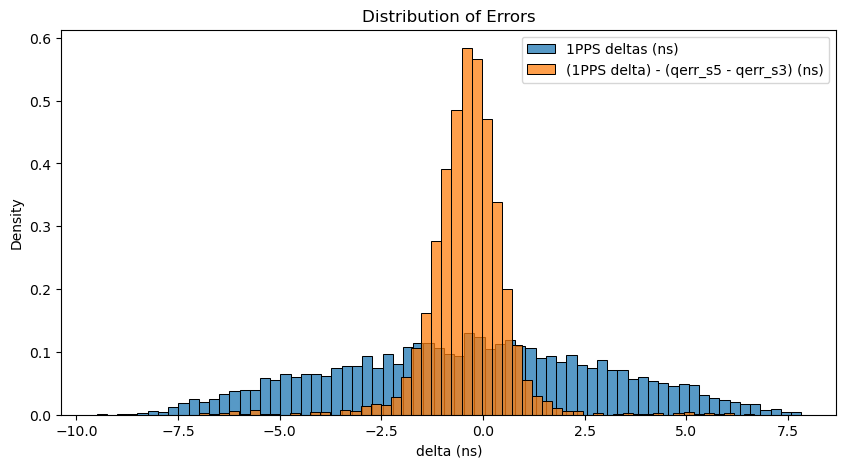

In [15]:
plt.figure(figsize=(10,5))
cols = ['delta (ns)', 'delta & qerrs (ns) [s5 - s3]']
low, high = -7, 7
trimmed = d_aligned[(low < d_aligned['delta & qerrs (ns) [s5 - s3]']) & (d_aligned['delta & qerrs (ns) [s5 - s3]'] < high)]
sns.histplot(d_aligned, x='delta (ns)', stat='density', binwidth=0.25, label='1PPS deltas (ns)');
sns.histplot(trimmed, x='delta & qerrs (ns) [s5 - s3]', stat='density', binwidth=0.25, label='(1PPS delta) - (qerr_s5 - qerr_s3) (ns)');
# print(f'Summary stats for {key}\n')
print(d_aligned['delta (ns)'].describe(), '\n\n')
print(trimmed['delta & qerrs (ns) [s5 - s3]'].describe(), '\n\n')

plt.title('Distribution of Errors')
plt.legend()

In [16]:
abs(s5_aligned['unix_timestamp'].diff()).describe()

count                         3601
mean     0 days 00:00:01.000000262
std      0 days 00:00:00.008043916
min         0 days 00:00:00.976200
25%         0 days 00:00:00.992068
50%         0 days 00:00:01.003685
75%         0 days 00:00:01.007860
max         0 days 00:00:01.026644
Name: unix_timestamp, dtype: object

In [17]:
abs(s3_aligned['unix_timestamp'].diff()).describe()

count                         3601
mean     0 days 00:00:01.000000788
std      0 days 00:00:00.008685932
min         0 days 00:00:00.960019
25%         0 days 00:00:00.991992
50%         0 days 00:00:01.004083
75%         0 days 00:00:01.007939
max         0 days 00:00:01.039149
Name: unix_timestamp, dtype: object

In [18]:
abs(d_aligned['unix_timestamp'].diff()).describe()

count                         3601
mean     0 days 00:00:01.009827691
std      0 days 00:00:00.008877386
min         0 days 00:00:01.002067
25%         0 days 00:00:01.008824
50%         0 days 00:00:01.010030
75%         0 days 00:00:01.010538
max         0 days 00:00:01.312124
Name: unix_timestamp, dtype: object

In [19]:
abs(s5_aligned['unix_timestamp'] - s3_aligned['unix_timestamp']).describe()

count                         3602
mean     0 days 00:00:00.006256374
std      0 days 00:00:00.004996185
min                0 days 00:00:00
25%         0 days 00:00:00.002888
50%         0 days 00:00:00.003056
75%         0 days 00:00:00.012796
max         0 days 00:00:00.034859
Name: unix_timestamp, dtype: object

In [20]:
abs(d_aligned['unix_timestamp'] - s3_aligned['unix_timestamp']).describe()

count                         3602
mean     0 days 00:00:19.271823650
std      0 days 00:00:09.903200064
min         0 days 00:00:00.797724
25%      0 days 00:00:10.480739500
50%         0 days 00:00:19.687934
75%      0 days 00:00:27.679675500
max         0 days 00:00:36.184399
Name: unix_timestamp, dtype: object